In [7]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Activation,BatchNormalization, Conv2D, Flatten, Dense, MaxPooling2D, Dropout, Add, LeakyReLU, UpSampling2D, Conv2DTranspose, Reshape
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [8]:
x_train = np.load('C:/Users/chj18/Desktop/dataset/x_train.npy')    # CT 이미지
y_train = np.load('C:/Users/chj18/Desktop/dataset/y_train.npy')    # 폐 영역 마스크 이미지
x_val = np.load('C:/Users/chj18/Desktop/dataset/x_val.npy')
y_val = np.load('C:/Users/chj18/Desktop/dataset/y_val.npy')

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

width = 256
height = 256
#(갯수, 크기, 스케일)

(240, 256, 256, 1) (240, 256, 256, 1)
(27, 256, 256, 1) (27, 256, 256, 1)


# 모델 구성

In [9]:
def segnet(input_size=(256, 256, 1)):
    kernel = 3
    
    img_input = Input(input_size)

    x = Conv2D(32, (kernel,kernel), padding = 'same', name = 'comv1', strides = (1,1))(img_input)
    x = BatchNormalization(name='bn1')(x)
    x = Activation('relu')(x)
    x = Conv2D(32, (kernel,kernel), padding = 'same', name = 'comv2')(x)
    x = BatchNormalization(name='bn2')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)

    x = Conv2D(64, (kernel,kernel), padding = 'same', name = 'comv3')(x)
    x = BatchNormalization(name='bn3')(x)
    x = Activation('relu')(x)
    x = Conv2D(64, (kernel,kernel), padding = 'same', name = 'comv4')(x)
    x = BatchNormalization(name='bn4')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)
    
    x = Conv2D(128, (kernel,kernel), padding = 'same', name = 'comv5')(x)
    x = BatchNormalization(name='bn5')(x)
    x = Activation('relu')(x)
    x = Conv2D(128, (kernel,kernel), padding = 'same', name = 'comv6')(x)
    x = BatchNormalization(name='bn6')(x)
    x = Activation('relu')(x)
    x = Conv2D(128, (kernel, kernel), padding='same', name='conv7')(x)
    x = BatchNormalization(name='bn7')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)
    
    x = Conv2D(256, (kernel,kernel), padding = 'same', name = 'comv8')(x)
    x = BatchNormalization(name='bn8')(x)
    x = Activation('relu')(x)
    x = Conv2D(256, (kernel,kernel), padding = 'same', name = 'comv9')(x)
    x = BatchNormalization(name='bn9')(x)
    x = Activation('relu')(x)
    x = Conv2D(256, (kernel, kernel), padding='same', name='conv10')(x)
    x = BatchNormalization(name='bn10')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)
    
    x = Conv2D(256, (kernel,kernel), padding = 'same', name = 'comv11')(x)
    x = BatchNormalization(name='bn11')(x)
    x = Activation('relu')(x)
    x = Conv2D(256, (kernel,kernel), padding = 'same', name = 'comv12')(x)
    x = BatchNormalization(name='bn12')(x)
    x = Activation('relu')(x)
    x = Conv2D(256, (kernel, kernel), padding='same', name='conv13')(x)
    x = BatchNormalization(name='bn13')(x)
    x = Activation('sigmoid')(x)
    x = MaxPooling2D()(x)
    
    # ------------------인코딩------------------
    
    x = Dense(512, activation = 'relu', name='fc1')(x)
    x = Dense(512, activation = 'relu', name='fc2')(x)
    
    x = UpSampling2D()(x)
    x = Conv2DTranspose(256, (kernel, kernel), padding='same', name='deconv1')(x)
    x = BatchNormalization(name='bn14')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(256, (kernel, kernel), padding='same', name='deconv2')(x)
    x = BatchNormalization(name='bn15')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(256, (kernel, kernel), padding='same', name='deconv3')(x)
    x = BatchNormalization(name='bn16')(x)
    x = Activation('relu')(x)
    
    x = UpSampling2D()(x)
    x = Conv2DTranspose(256, (kernel, kernel), padding='same', name='deconv4')(x)
    x = BatchNormalization(name='bn17')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(256, (kernel, kernel), padding='same', name='deconv5')(x)
    x = BatchNormalization(name='bn18')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(128, (kernel, kernel), padding='same', name='deconv6')(x)
    x = BatchNormalization(name='bn19')(x)
    x = Activation('relu')(x)

    x = UpSampling2D()(x)
    x = Conv2DTranspose(128, (kernel, kernel), padding='same', name='deconv7')(x)
    x = BatchNormalization(name='bn20')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(128, (kernel, kernel), padding='same', name='deconv8')(x)
    x = BatchNormalization(name='bn21')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(64, (kernel, kernel), padding='same', name='deconv9')(x)
    x = BatchNormalization(name='bn22')(x)
    x = Activation('relu')(x)
    
    x = UpSampling2D()(x)
    x = Conv2DTranspose(64, (kernel, kernel), padding='same', name='deconv10')(x)
    x = BatchNormalization(name='bn23')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(32, (kernel, kernel), padding='same', name='deconv11')(x)
    x = BatchNormalization(name='bn24')(x)
    x = Activation('relu')(x)
    
    x = UpSampling2D()(x)
    x = Conv2DTranspose(32, (kernel, kernel), padding='same', name='deconv12')(x)
    x = BatchNormalization(name='bn25')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(1, (kernel, kernel), padding='same', name='deconv13')(x)
    x = BatchNormalization(name='bn26')(x)
    x = Activation('sigmoid')(x)
    pred = Reshape((height, width, 1))(x)
    
    # ------------------디코딩------------------
    
    return Model(inputs=img_input, outputs=pred) 

In [10]:
EPOCHS = 80     # 수정
BATCH_SIZE = 4  # 수정

model = segnet(input_size=(height,width, 1))

print(model.summary())

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc', 'mse'])

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=EPOCHS, #model fit(train)한후에 history에 저장
                batch_size=BATCH_SIZE,
                 callbacks=[
                ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, verbose=1, mode='auto', min_lr=1e-05)]
                )

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 comv1 (Conv2D)              (None, 256, 256, 32)      320       
                                                                 
 bn1 (BatchNormalization)    (None, 256, 256, 32)      128       
                                                                 
 activation_26 (Activation)  (None, 256, 256, 32)      0         
                                                                 
 comv2 (Conv2D)              (None, 256, 256, 32)      9248      
                                                                 
 bn2 (BatchNormalization)    (None, 256, 256, 32)      128       
                                                                 
 activation_27 (Activation)  (None, 256, 256, 32)      0   

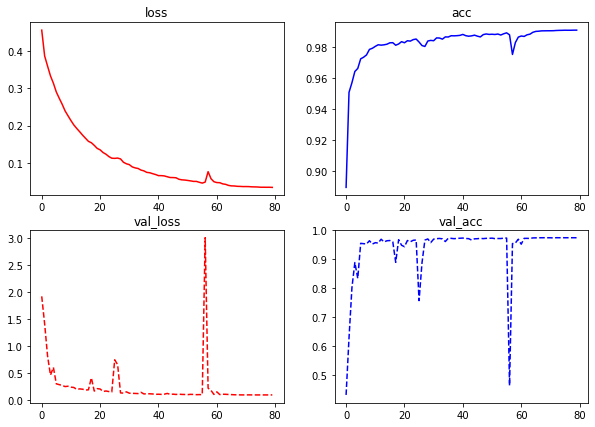

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(10, 7))

ax[0, 0].set_title('loss')
ax[0, 0].plot(history.history['loss'], 'r')
ax[0, 1].set_title('acc')
ax[0, 1].plot(history.history['acc'], 'b')

ax[1, 0].set_title('val_loss')
ax[1, 0].plot(history.history['val_loss'], 'r--')
ax[1, 1].set_title('val_acc')
ax[1, 1].plot(history.history['val_acc'], 'b--')

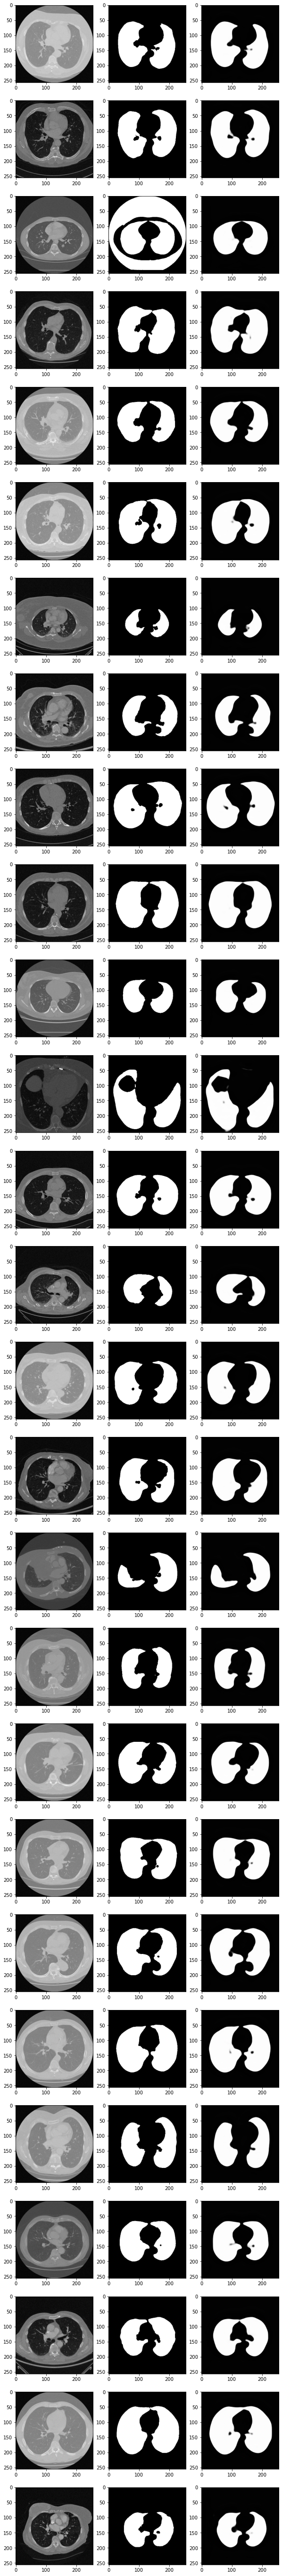

In [12]:
preds = model.predict(x_val) # predict를 통해 val 데이터를 prediction해서 preds에 저장

fig, ax = plt.subplots(len(x_val), 3, figsize=(10, 100))

for i, pred in enumerate(preds):
    ax[i, 0].imshow(x_val[i].squeeze(), cmap='gray')    #ct데이터
    ax[i, 1].imshow(y_val[i].squeeze(), cmap='gray')    #정답데이터
    ax[i, 2].imshow(pred.squeeze(), cmap='gray')        #예측한 결과값